In [5]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
CONVERTED_DATABASE_NAME = '/data/experiments/YHE-R/converted-databases/exp-YHE-R-run-YHE114_01_Slot1-1_1_3008-converted.sqlite'

In [7]:
# frame types for PASEF mode
FRAME_TYPE_MS1 = 0
FRAME_TYPE_MS2 = 8

In [9]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frame_intensity_df = pd.read_sql_query("select frame_id,sum(intensity),retention_time_secs from frames where frame_type == {} group by frame_id order by retention_time_secs".format(FRAME_TYPE_MS1), db_conn)
db_conn.close()

In [10]:
frame_intensity_df.head()

,frame_id,sum(intensity),retention_time_secs
0,1,3032619,0.528112
1,2,2990879,0.657873
2,3,2988419,0.799064
3,4,2955290,0.928864
4,5,2916573,1.064715


In [11]:
frame_intensity_df.rename(columns={'sum(intensity)':'intensity'}, inplace=True)


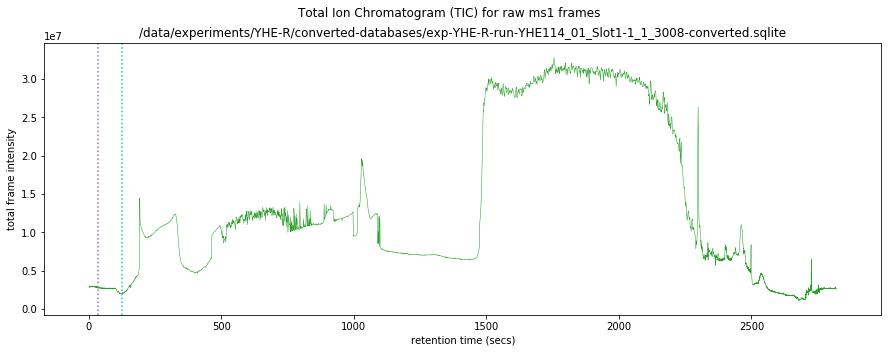

In [14]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
plt.axvline(x=34.2, linestyle=':', color='tab:purple')
plt.axvline(x=126, linestyle=':', color='tab:cyan')
ax1.plot(frame_intensity_df.retention_time_secs, frame_intensity_df.intensity, marker='', linestyle='-', linewidth=0.5, ms=2, color='tab:green', label='frame')
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for raw ms1 frames')
plt.title('{}'.format(CONVERTED_DATABASE_NAME))
plt.show()